# Demo: user.report()

Generate the reports of the overall usage of the organizations.   
Reports define organization usage metrics in one place for the day, week, or month.  
Administrators can monitor who is using which services, consuming how much credits and storage within certain time period.  

### Setup the Environment

In [1]:
from arcgis.gis import GIS
import datetime as _dt
import pandas as pd

In [2]:
gis = GIS(profile='your_online_profile')

In [3]:
date_time_str = '16/02/22'
then = _dt.datetime.strptime(date_time_str, '%d/%m/%y')
val = int(then.timestamp() * 1000)

## Create an Organization Report
#### Three arguments: 
1. report_type: Type of organizational report to generate (credits, content, users, activity).
2. start_time: The day on which the report is generated.  
3. duration: The time frame on which the reports are ran.

In [4]:
user = gis.users.me
final_item = user.report(
            report_type='content', duration="weekly", start_time=val
        )
final_item

<Item title:"OrganizationItems_2022-03-14" type:Administrative Report owner:UserName2_orgname>

In [7]:
final_item = gis.content.get("acb58e704a5d4f3eb7c6e89e04b0eccc")

### Returns an item: Useful for record keeping and finding it in your org

In [8]:
csv_file = final_item.get_data()

In [9]:
df = pd.read_csv(csv_file)

### View The Most Viewed Items

In [10]:
df.sort_values(by=['View Counts'], ascending=False).head()

,Title,Item ID,Item Url,Item Type,Date Created,Date Modified,Content Category,View Counts,Owner,File Storage Size,Feature Storage Size,Share Level,# of Groups shared with,Tags,Number of Comments,Is Hosted Service
7263,yolov3_coco_weights,8b4600eb9a29407bbfe51491ad5bf62c,NaN,Deep Learning Package,Wed May 06 10:53:16 UTC 2020,Wed May 06 10:53:24 UTC 2020,NaN,20624,api_data_owner,230470267,0,public,0,"[yolov3, weights, coco]",0,False
599,calgary_no_southland_solar,adaead8cb3174ac6a89f0c14ae70aadd,https://services7.arcgis.com/JEwYeAy2cc8qOe3o/...,Feature Service,Tue Jul 07 08:36:20 UTC 2020,Thu Oct 22 18:40:39 UTC 2020,NaN,5763,api_data_owner,0,2768896,public,0,"[calgary, solar power prediction]",0,True
3561,oma-test-map,2051a50d9370428297dc08a87db4a43f,NaN,Web Map,Mon Nov 18 18:52:38 UTC 2019,Mon Nov 18 19:11:49 UTC 2019,NaN,5457,api_data_owner,17596,0,org,1,"[Offline, checkout, disconnected]",0,False
2038,CrimeAnalysisData,99d6d5b710a845839d38f5a5eef66626,https://services7.arcgis.com/JEwYeAy2cc8qOe3o/...,Feature Service,Wed May 29 04:25:27 UTC 2019,Mon Aug 03 07:13:43 UTC 2020,NaN,4359,api_data_owner,0,5341184,public,3,"[Data, Analysis, ArcGIS, Service Definition, .sd]",0,True
3562,oma-test-map-updates,7cb38a3325564607a81c0da5733bfbfc,NaN,Web Map,Mon Nov 18 19:19:17 UTC 2019,Mon Nov 18 19:20:56 UTC 2019,NaN,2998,api_data_owner,17596,0,private,0,"[Offline, checkout, disconnected]",0,False


### Largest Sized Item

In [11]:
df.sort_values(by=['File Storage Size'], ascending=False).head()

,Title,Item ID,Item Url,Item Type,Date Created,Date Modified,Content Category,View Counts,Owner,File Storage Size,Feature Storage Size,Share Level,# of Groups shared with,Tags,Number of Comments,Is Hosted Service
2210,detection_of_electric_utility_features_and_veg...,01ca39eab00e4780b0517af11d971b31,NaN,Image Collection,Wed May 26 09:33:05 UTC 2021,Wed May 26 09:33:19 UTC 2021,NaN,97,api_data_owner,7644076970,0,public,0,Deep Learning,0,False
2929,glacial_terminus_point_segmentation,cc750295180a487aa7af67a67cadff78,NaN,Image Collection,Fri Aug 06 06:29:32 UTC 2021,Tue Aug 10 12:13:04 UTC 2021,NaN,17,api_data_owner,6754807494,0,public,0,sample data,0,False
300,arcgis_dl_backbones,d404fd50d05d475f8d92eedb78e1c961,NaN,Code Sample,Wed Jan 27 07:27:44 UTC 2021,Mon Feb 15 03:29:55 UTC 2021,[/Themes/Region/World],827,api_data_owner,5773974473,0,public,0,"[metapackage, arcgis_dl_backbones, conda, cond...",0,False
6905,train_a_tensorflow-lite_model_for_identifying_...,81932a51f77b4d2d964218a7c5a4af17,NaN,Image Collection,Mon Aug 31 04:49:43 UTC 2020,Sun Dec 13 16:46:15 UTC 2020,NaN,398,api_data_owner,4489297344,0,public,2,"[sample data, Deep Learning]",0,False
726,classification_of_raw_point_clouds_using_deep_...,a138ca788ea148b282c70a83d609994a,NaN,Image Collection,Mon Sep 14 06:05:49 UTC 2020,Fri Jul 30 11:20:01 UTC 2021,NaN,210,api_data_owner,4183005924,0,public,0,"[sample data, Deep Learning, PointCNN]",0,False


### Storage By User

In [12]:
import math
def convert_size(size_bytes):
    if size_bytes == 0:
        return "0B"
    size_name = ("B", "KB", "MB", "GB", "TB", "PB", "EB", "ZB", "YB")
    i = int(math.floor(math.log(size_bytes, 1024)))
    p = math.pow(1024, i)
    s = round(size_bytes / p, 2)
    return "%s %s" % (s, size_name[i])

<AxesSubplot:ylabel='Owner'>

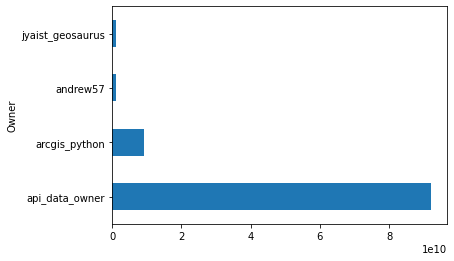

In [13]:
gb = df.groupby("Owner")['File Storage Size'].sum()
gb.nlargest(4).plot(kind='barh')


In [14]:
gb.apply(convert_size)

Owner
OrgUser1           847.39 MB
OrgUser2              40.87 MB
UserName2_orgname         66.34 KB
UserName3_orgname       34.05 KB
UserName7_orgname         156.08 KB
UserName1              0B
UserName8_orgname    932.97 MB
UserName9_orgname          442.46 MB
jason_smith21                  994.4 MB
api_data_owner            85.75 GB
arcgis_python              8.46 GB
UserName4_orgname          75.07 KB
UserName5_orgname                  0B
guest_interview            3.25 KB
UserName6_orgname          883.0 B
UserName10_orgname         975.81 MB
UserName11_orgname      447.37 MB
UserName12_orgname         658.17 MB
pythondemo                26.66 KB
rohitgeo                   4.85 KB
UserName13_orgname         284.41 MB
UserName14_orgname        2.01 MB
UserName15_orgname           6.57 MB
Name: File Storage Size, dtype: object